# **Progetto Python Start2Impact**

Dataset: Google Play Store Apps </br>
Student: Steven Mariani </br>
</br>
Traccia: </br>

Vuoi lanciarti nella creazione della tua prima app, ma prima vuoi identificare il settore giusto. Decidi di adottare un approccio data-driven, quindi scarichi i dati di tutto l’app store di Google. In questo dataset hai a disposizione per ogni app il rating, le reviews, il numero di install, la tipologia (a pagamento o gratuita), il prezzo e la categoria.

Immagina ora di dover scegliere come strutturare la tua app. Partendo da questi dati, prova a descrivere il dataset e ad analizzare le correlazioni tra variabili, outlier, le categorie dove c’è più concorrenza e quelle dove c’è più interesse. Prova infine a proporre una tua strategia per la tua app.

Assicurati però di aver prima esplorato i dati a fondo e di mostrare i tuoi ragionamenti.

## **Codice preliminare**

Il codice preliminare rappresenta tutta quella serie di pratiche operative volte a predisporre i dataset a essere pronti all'utilizzo: importazione delle librerie, caricamento dei dataset, pulizia dei dataset ed eventuali attività gestionali relative al dato grezzo.

### **Caricamento delle risorse necessarie**

In [ ]:
#Import delle librerie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
#Autenticazione

from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Recupero dei dataset dal drive

path_google_ps = '/content/drive/MyDrive/02_Formazione/2021-2023_Start2Impact/2022-2023_Data-Analysis/Python-con-Pandas/Dataset/googleplaystore.csv'
path_google_ps_user_reviews = '/content/drive/MyDrive/02_Formazione/2021-2023_Start2Impact/2022-2023_Data-Analysis/Python-con-Pandas/Dataset/googleplaystore_user_reviews.csv'

df_google_ps = pd.read_csv(path_google_ps)
df_google_ps_user_reviews = pd.read_csv(path_google_ps_user_reviews)

### **Comprensione del dataset Google Play Store**

In [ ]:
#Stampo il df google play store

df_google_ps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Approfondisco la forma del dataframe

print(f'Il dataframe contiene {df_google_ps.shape[0]} righe e {df_google_ps.shape[1]} colonne')

Il dataframe contiene 10841 righe e 13 colonne


In [ ]:
#Approfondisco la struttura del dataframe

df_google_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Analizzo le varie colonne per comprenderne i valori

for columns in df_google_ps.columns:
  unique_values = df_google_ps[columns].unique()
  print(f'{columns},{unique_values}')

App,['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category,['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating,[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews,['159' '967' '87510' ... '603' '1195' '398307']
Size,[

### **Pulizia del dataset Google Play Store**

In [ ]:
#Creo una copia del dataset e lo pulisco

df_google_ps_clean = df_google_ps.copy()

df_google_ps_clean = df_google_ps_clean.drop(10472, axis=0) #Elimino la riga che presenta errore di inserimento

In [ ]:
#Creo una funzione per pulire la colonna Size

def f_standardize_size(values):
  if 'k' in values:
    return float(values.replace('k', '')) / 1000
  elif 'M' in values:
    return float(values.replace('M', ''))
  elif 'Varies with device' in values:
    return np.nan
  else:
    return float(values)

In [ ]:
#Inserisco una condizione di attivazione

if df_google_ps_clean['Size'].dtype == 'object':
  df_google_ps_clean['Size'] = df_google_ps_clean['Size'].apply(f_standardize_size)
else:
  print('Fired yet')

In [ ]:
#Continuo la pulizia

df_google_ps_clean['Installs'] = df_google_ps_clean['Installs'].str.replace('+','',regex=True).str.replace(',','',regex=True).astype(int) #Rimuovo il + e la , e casto in int
df_google_ps_clean['Price'] = df_google_ps_clean['Price'].str.replace('$','',regex=True).astype(float) #Rimuovo il $ e casto in float
df_google_ps_clean['Reviews'] = df_google_ps_clean['Reviews'].astype(int) #Casto in int
df_google_ps_clean[['Genres_1','Genres_2']] = df_google_ps_clean['Genres'].str.split(';', expand=True, n=2) #Separo i valori presenti dentro Genres e li attribuisco a 2 colonne
df_google_ps_clean['Genres_1'] = df_google_ps_clean['Genres_1'].fillna(np.nan) #Riempio con nan i valori nulli
df_google_ps_clean['Genres_2'] = df_google_ps_clean['Genres_2'].fillna(np.nan) #Riempio con nan i valori nulli
df_google_ps_clean = df_google_ps_clean.drop(columns=['Genres']) #Elimino la colonna originaria dal dataframe

In [ ]:
df_google_ps_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Genres_2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity


In [ ]:
df_google_ps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Genres_1        10840 non-null  object 
 13  Genres_2        498 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [ ]:
#Conteggio dei valori nulli

count_nan = df_google_ps_clean.isnull().sum()
count_nan

App                   0
Category              0
Rating             1474
Reviews               0
Size               1695
Installs              0
Type                  1
Price                 0
Content Rating        0
Last Updated          0
Current Ver           8
Android Ver           2
Genres_1              0
Genres_2          10342
dtype: int64

In [ ]:
#Decido di gestire i valori duplicati rimuovendoli e sovrascrivendo il dataset

df_google_ps_clean = df_google_ps_clean[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Last Updated','Current Ver','Android Ver','Genres_1']].dropna()
df_google_ps_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.619,1000,Free,0.0,Everyone,"March 23, 2014",0.8,2.2 and up,Books & Reference
10834,FR Calculator,FAMILY,4.0,7,2.600,500,Free,0.0,Everyone,"June 18, 2017",1.0.0,4.1 and up,Education
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000,5000,Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600,100,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up,Education


In [ ]:
#Controllo che il dropna abbia funzionato

count_nan_2 = df_google_ps_clean.isnull().sum()
count_nan_2

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Current Ver       0
Android Ver       0
Genres_1          0
dtype: int64

In [ ]:
df_google_ps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Last Updated    7723 non-null   object 
 10  Current Ver     7723 non-null   object 
 11  Android Ver     7723 non-null   object 
 12  Genres_1        7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


### **Comprensione del dataset Google Play Store User Reviews**

In [ ]:
#Approfondisco la struttura del dataframe

df_google_ps_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#Stampo il df google play store user reviews

df_google_ps_user_reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#Approfondisco la forma del dataframe

print(f'Il dataframe contiene {df_google_ps_user_reviews.shape[0]} righe e {df_google_ps_user_reviews.shape[1]} colonne')

Il dataframe contiene 64295 righe e 5 colonne


In [ ]:
#Approfondisco la struttura del dataframe

df_google_ps_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


### **Pulizia del dataset Google Play Store**

In [ ]:
#Pulisco il dataset da valori NaN

df_google_ps_user_reviews = df_google_ps_user_reviews[['App','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']].dropna()
df_google_ps_user_reviews

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.000000,0.533333
1,10 Best Foods for You,Positive,0.250000,0.288462
3,10 Best Foods for You,Positive,0.400000,0.875000
4,10 Best Foods for You,Positive,1.000000,0.300000
5,10 Best Foods for You,Positive,1.000000,0.300000
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000


In [ ]:
#Approfondisco la struttura del dataframe

df_google_ps_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Sentiment               37432 non-null  object 
 2   Sentiment_Polarity      37432 non-null  float64
 3   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


### **Unione dataset**

In [ ]:
#Unisco i due dataset

df_merged = pd.merge(df_google_ps_clean, df_google_ps_user_reviews, how='left', on='App')

df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51915,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.619,1000,Free,0.0,Everyone,"March 23, 2014",0.8,2.2 and up,Books & Reference,NaN,NaN,NaN
51916,FR Calculator,FAMILY,4.0,7,2.600,500,Free,0.0,Everyone,"June 18, 2017",1.0.0,4.1 and up,Education,NaN,NaN,NaN
51917,Sya9a Maroc - FR,FAMILY,4.5,38,53.000,5000,Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up,Education,NaN,NaN,NaN
51918,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600,100,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up,Education,NaN,NaN,NaN


In [ ]:
#Pulisco il dataset dai valori NaN

df_merged = df_merged[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Last Updated','Current Ver','Android Ver','Genres_1','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']].dropna()

df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genres_1,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Negative,-0.250000,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Negative,-0.725000,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51834,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,"July 6, 2018",5.2,5.0 and up,Communication,Positive,0.100000,0.492308
51835,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,"July 6, 2018",5.2,5.0 and up,Communication,Positive,0.225000,0.426786
51836,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,"July 6, 2018",5.2,5.0 and up,Communication,Positive,0.650000,0.625000
51837,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,"July 6, 2018",5.2,5.0 and up,Communication,Positive,0.345455,0.484848


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45010 entries, 1 to 51838
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     45010 non-null  object 
 1   Category                45010 non-null  object 
 2   Rating                  45010 non-null  float64
 3   Reviews                 45010 non-null  int64  
 4   Size                    45010 non-null  float64
 5   Installs                45010 non-null  int64  
 6   Type                    45010 non-null  object 
 7   Price                   45010 non-null  float64
 8   Content Rating          45010 non-null  object 
 9   Last Updated            45010 non-null  object 
 10  Current Ver             45010 non-null  object 
 11  Android Ver             45010 non-null  object 
 12  Genres_1                45010 non-null  object 
 13  Sentiment               45010 non-null  object 
 14  Sentiment_Polarity      45010 non-null

## **Exporatory Data Analysis**

L'EDA, o exploratory data analysis, rappresenta l'insieme di analisi volte a comprendere relazioni, tendenze e caratteristiche del dataset che si sta analizzando.

### **Variabili singole**

#### **Variabile "Categoria"**

In [ ]:
#Descrittive

df_google_ps_clean['Category'].describe()

count       7723
unique        33
top       FAMILY
freq        1616
Name: Category, dtype: object

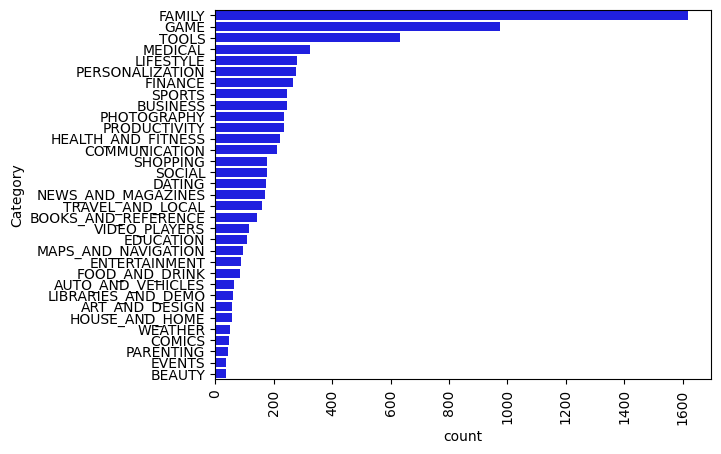

In [ ]:
#Countplot

order = df_google_ps_clean['Category'].value_counts().index
sns.countplot(y='Category', data=df_google_ps_clean, order=order, color='blue')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_category = df_google_ps_clean['Category'].value_counts().reset_index()
temporary_table_category.columns = ['Category','Count']

temporary_table_category['percent'] = (temporary_table_category['Count'] / temporary_table_category['Count'].sum()*100).round(2)
temporary_table_category.head(10)

,Category,Count,percent
0,FAMILY,1616,20.92
1,GAME,974,12.61
2,TOOLS,633,8.20
3,MEDICAL,324,4.20
4,LIFESTYLE,280,3.63
5,PERSONALIZATION,278,3.60
6,FINANCE,266,3.44
7,SPORTS,247,3.20
8,BUSINESS,246,3.19
9,PHOTOGRAPHY,236,3.06


In [ ]:
#Stampo delle considerazioni di alto livello

print(f"Le categorie di app con il maggior peso all\'interno del mercato sono {temporary_table_category['Category'].loc[0]}, {temporary_table_category['Category'].loc[1]}, {temporary_table_category['Category'].loc[2]}.\
\nCiò non significa che creare un\'app in queste categorie ne decreti il successo, tuttavia è un fenomeno del mercato da analizzare e tenere in considerazione")

Le categorie di app con il maggior peso all'interno del mercato sono FAMILY, GAME, TOOLS.
Ciò non significa che creare un'app in queste categorie ne decreti il successo, tuttavia è un fenomeno del mercato da analizzare e tenere in considerazione


#### **Variabile "Rating"**

In [ ]:
#Descrittive

df_google_ps_clean['Rating'].describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

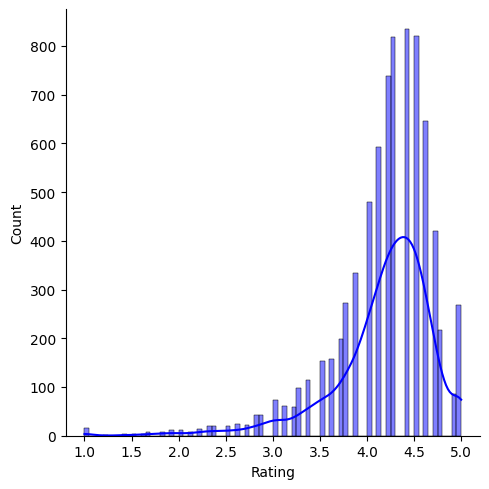

In [ ]:
#Distribuzione della variabile Rating

sns.displot(df_google_ps_clean['Rating'], color='blue', kde=True)
plt.show()

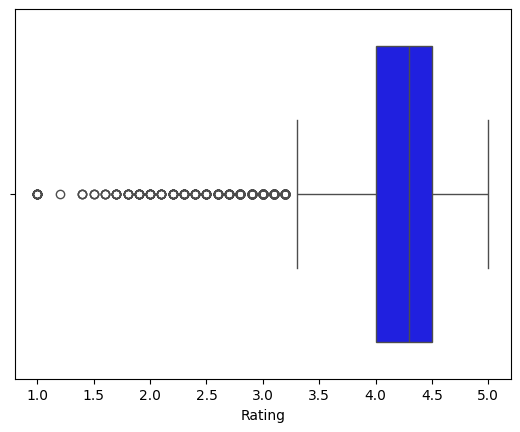

In [ ]:
#Boxplot

sns.boxplot(df_google_ps_clean['Rating'], color='blue', orient='h')
plt.show()

In [ ]:
#Skewness

df_google_ps_clean_rating_skew = df_google_ps_clean['Rating'].dropna().copy()
skewness_value_rating = skew(df_google_ps_clean_rating_skew).round(2)

if skewness_value_rating == 0:
  print(f"Il valore skew è {skewness_value_rating} dunque la distribuzione è simmetrica")
elif skewness_value_rating < 1 and skewness_value_rating > 0 or skewness_value_rating > -1 and skewness_value_rating < 0:
  print(f"Il valore skew è {skewness_value_rating} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_value_rating} dunque la distribuzione è asimmetrica")

Il valore skew è -1.75 dunque la distribuzione è asimmetrica


In [ ]:
print(f"La variabile ratings ha una mediana di {df_google_ps_clean['Rating'].describe()[5]} con un valore massimo di {df_google_ps_clean['Rating'].describe()[7]}.\
\nQuesto indica che le curva che descrive il fenomeno tende a essere spostata sulla destra e ad avere una coda lunga sulla sinitra del grafico.\
\nLe recensioni delle app presenti sullo store sono dunque tutte abbastanza buone in termini di valenza.\
\nIl boxplot individua numerosi outliers, questo aspetto andrà tenuto in considerazione nelle analisi successive.")

La variabile ratings ha una mediana di 4.3 con un valore massimo di 5.0.
Questo indica che le curva che descrive il fenomeno tende a essere spostata sulla destra e ad avere una coda lunga sulla sinitra del grafico.
Le recensioni delle app presenti sullo store sono dunque tutte abbastanza buone in termini di valenza.
Il boxplot individua numerosi outliers, questo aspetto andrà tenuto in considerazione nelle analisi successive.


In [ ]:
#Calcolo l'indice di Curtosi

curtosi_rating = kurtosis(df_google_ps_clean['Rating'], fisher=True)

if curtosi_rating > 0.5:
  interpretazione_rating = "la distribuzione è leptocurtica con code pesanti."
elif curtosi_rating < -0.5:
  interpretazione_rating = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione_rating = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi_rating}. Secondo l'interpretazione, {interpretazione_rating}")

Curtosi della variabile 'Rating': 5.066978239998127. Secondo l'interpretazione, la distribuzione è leptocurtica con code pesanti.


#### **Variabile "Reviews"**

In [ ]:
#Descrittive

df_google_ps_clean['Reviews'].describe()

count    7.723000e+03
mean     2.948983e+05
std      1.863933e+06
min      1.000000e+00
25%      1.075000e+02
50%      2.332000e+03
75%      3.905300e+04
max      4.489389e+07
Name: Reviews, dtype: float64

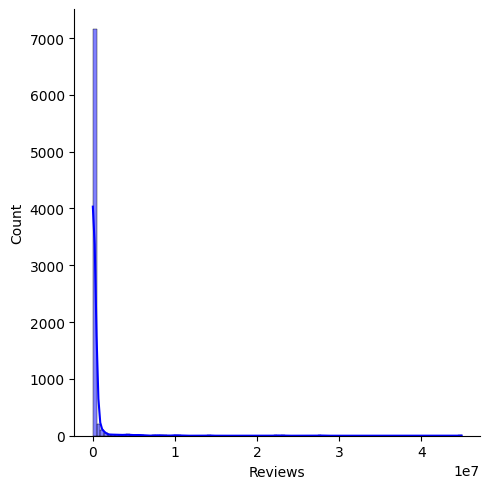

In [ ]:
#Distribuzione della variabile Reviews

sns.displot(df_google_ps_clean['Reviews'], color='blue', bins=100, kde=True)
plt.show()

<Axes: xlabel='Reviews'>

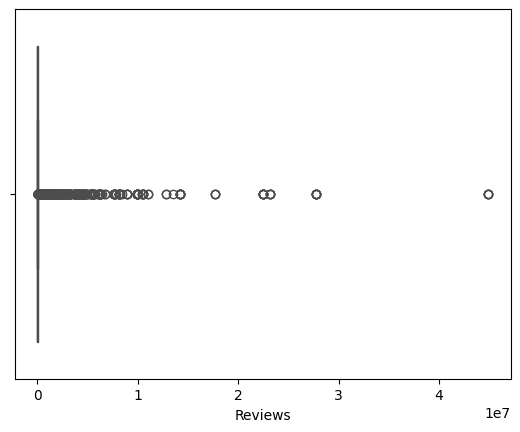

In [ ]:
#Boxplot

sns.boxplot(df_google_ps_clean['Reviews'], color='blue', orient='h')

In [ ]:
#Skewness

df_google_ps_clean_reviews_skew = df_google_ps_clean['Reviews'].dropna().copy()
skewness_value_reviews = skew(df_google_ps_clean_reviews_skew).round(2)

if skewness_value_reviews == 0:
  print(f"Il valore skew è {skewness_value_reviews} dunque la distribuzione è simmetrica")
elif skewness_value_reviews < 1 and skewness_value_reviews > 0 or skewness_value_reviews > -1 and skewness_value_reviews < 0:
  print(f"Il valore skew è {skewness_value_reviews} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_value_reviews} dunque la distribuzione è asimmetrica")

Il valore skew è 13.63 dunque la distribuzione è asimmetrica


In [ ]:
#Tabella delle frequenze

temporary_table_reviews = df_google_ps_clean['Reviews'].value_counts().reset_index()
temporary_table_reviews.columns = ['Reviews','Count']

temporary_table_reviews['percent'] = (temporary_table_reviews['Count'] / temporary_table_reviews['Count'].sum()*100).round(2)
temporary_table_reviews.head(10)

,Reviews,Count,percent
0,2,82,1.06
1,3,77,1.00
2,5,74,0.96
3,4,72,0.93
4,1,66,0.85
5,6,62,0.80
6,7,61,0.79
7,8,55,0.71
8,12,53,0.69
9,10,45,0.58


In [ ]:
print(f"Il numero maggiore di app ha da {temporary_table_reviews['Reviews'].loc[0]} o {temporary_table_reviews['Reviews'].loc[1]} recensioni.\
\nIl che spiega l'estrema forma \'skew positiva\' della distribuzione.")

Il numero maggiore di app ha da 2 o 3 recensioni.
Il che spiega l'estrema forma 'skew positiva' della distribuzione.


In [ ]:
#Calcolo l'indice di Curtosi

curtosi_reviews = kurtosis(df_google_ps_clean['Reviews'], fisher=True)

if curtosi_reviews > 0.5:
  interpretazione_reviews = "la distribuzione è leptocurtica con code pesanti."
elif curtosi_reviews < -0.5:
  interpretazione_reviews = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione_reviews = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi_reviews}. Secondo l'interpretazione, {interpretazione_reviews}")

Curtosi della variabile 'Rating': 242.8125247269147. Secondo l'interpretazione, la distribuzione è leptocurtica con code pesanti.


#### **Variabile "Size"**

In [ ]:
#Descrittive

df_google_ps_clean['Size'].describe()

count    7723.000000
mean       22.970456
std        23.449629
min         0.008500
25%         5.300000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size, dtype: float64

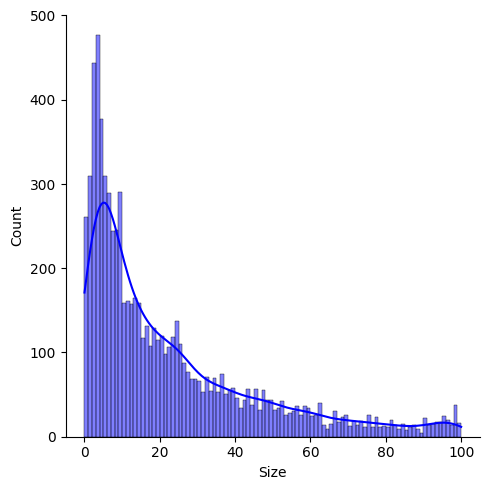

In [ ]:
#Distribuzione della variabile Size

sns.displot(df_google_ps_clean['Size'], color='blue', bins=100, kde=True)
plt.show()

<Axes: xlabel='Size'>

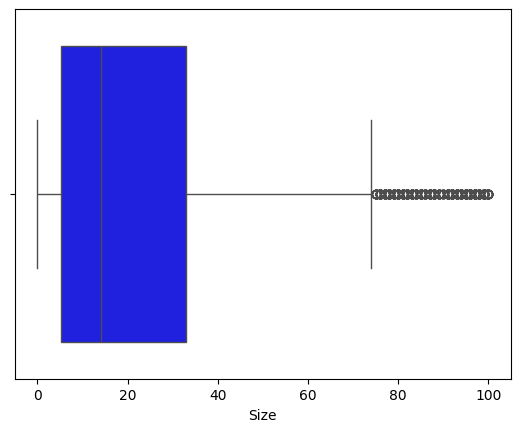

In [ ]:
#Boxplot

sns.boxplot(df_google_ps_clean['Size'], color='blue', orient='h')

In [ ]:
#Skewness

df_google_ps_clean_size_skew = df_google_ps_clean['Size'].dropna().copy()
skewness_value_size = skew(df_google_ps_clean_size_skew).round(2)

if skewness_value_size == 0:
  print(f"Il valore skew è {skewness_value_size} dunque la distribuzione è simmetrica")
elif skewness_value_size < 1 and skewness_value_size > 0 or skewness_value_size > -1 and skewness_value_size < 0:
  print(f"Il valore skew è {skewness_value_size} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_value_size} dunque la distribuzione è asimmetrica")

Il valore skew è 1.43 dunque la distribuzione è asimmetrica


In [ ]:
print("La variabile che descrive la grandezza dell'app ha una distribuzione skew positiva, con numerosi valori outlier.\
\nAndrà tenuto in considerazione successivamente questo punto.")

La variabile che descrive la grandezza dell'app ha una distribuzione skew positiva, con numerosi valori outlier.
Andrà tenuto in considerazione successivamente questo punto.


In [ ]:
#Calcolo l'indice di Curtosi

curtosi = kurtosis(df_google_ps_clean['Size'], fisher=True)

if curtosi > 0.5:
  interpretazione = "la distribuzione è leptocurtica con code pesanti."
elif curtosi < -0.5:
  interpretazione = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi}. Secondo l'interpretazione, {interpretazione}")

Curtosi della variabile 'Rating': 1.426664748672538. Secondo l'interpretazione, la distribuzione è leptocurtica con code pesanti.


#### **Variabile "Installs"**

In [ ]:
#Descrittive

df_google_ps_clean_temporary = df_google_ps_clean['Installs'].copy().astype(str)
df_google_ps_clean_temporary.describe()

count        7723
unique         19
top       1000000
freq         1301
Name: Installs, dtype: object

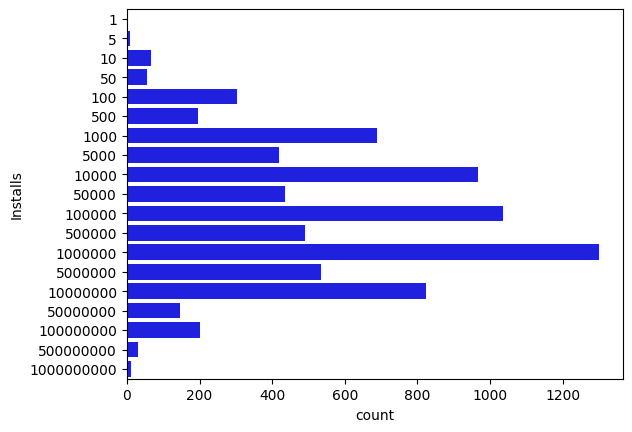

In [ ]:
#Distribuzione della variabile Installs

sns.countplot(y='Installs', data = df_google_ps_clean, color='blue')
plt.show()

In [ ]:
print("La parte maggiore delle app del dataset è stata scaricata oltre 1 milione, 10 e 100 mila volte.")

La parte maggiore delle app del dataset è stata scaricata oltre 1 milione, 10 e 100 mila volte.


#### **Variabile "Type"**

In [ ]:
#Descrittive

df_google_ps_clean['Type'].describe()

count     7723
unique       2
top       Free
freq      7146
Name: Type, dtype: object

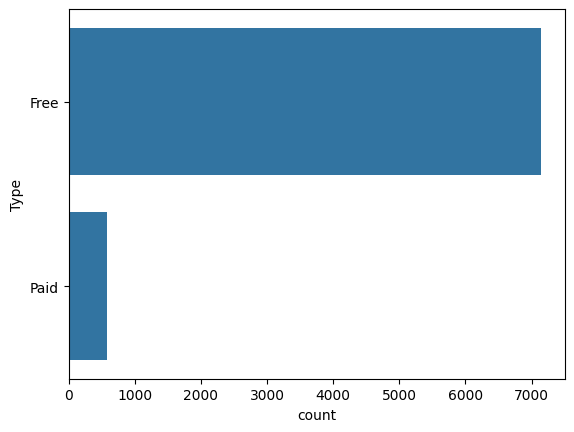

In [ ]:
#Distribuzione della variabile Type

sns.countplot(y='Type', data = df_google_ps_clean)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_type = df_google_ps_clean['Type'].value_counts().reset_index()
temporary_table_type.columns = ['Type','Count']

temporary_table_type['percent'] = (temporary_table_type['Count'] / temporary_table_type['Count'].sum()*100).round(2)
temporary_table_type.head(2)

,Type,Count,percent
0,Free,7146,92.53
1,Paid,577,7.47


In [ ]:
print(f"La maggior parte delle app (il {temporary_table_type['percent'].loc[0]}%) del dataset è gratuita.")

La maggior parte delle app (il 92.53%) del dataset è gratuita.


#### **Variabile "Price"**

In [ ]:
#Descrittive

df_google_ps_clean['Price'].describe()

count    7723.000000
mean        1.128169
std        17.408036
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

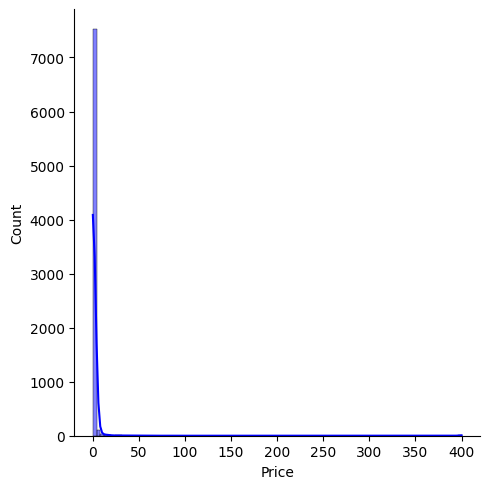

In [ ]:
#Distribuzione della variabile Price

sns.displot(df_google_ps_clean['Price'], color='blue', bins=100, kde=True)
plt.show()

<Axes: xlabel='Price'>

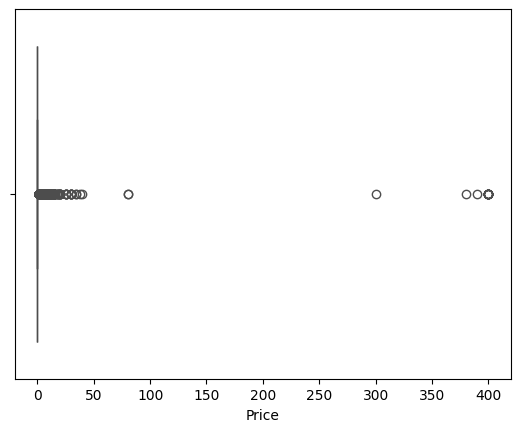

In [ ]:
#Boxplot

sns.boxplot(df_google_ps_clean['Price'], color='blue', orient='h')

In [ ]:
#Skewness

df_google_ps_clean_price_skew = df_google_ps_clean['Price'].dropna().copy()
skewness_value_price = skew(df_google_ps_clean_price_skew).round(2)

if skewness_value_price == 0:
  print(f"Il valore skew è {skewness_value_price} dunque la distribuzione è simmetrica")
elif skewness_value_price < 1 and skewness_value_price > 0 or skewness_value_price > -1 and skewness_value_price < 0:
  print(f"Il valore skew è {skewness_value_price} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_value_price} dunque la distribuzione è asimmetrica")

Il valore skew è 22.16 dunque la distribuzione è asimmetrica


In [ ]:
#Tabella delle frequenze

temporary_table_price = df_google_ps_clean['Price'].value_counts().reset_index()
temporary_table_price.columns = ['Price','Count']

temporary_table_price['percent'] = (temporary_table_price['Count'] / temporary_table_price['Count'].sum()*100).round(2)
temporary_table_price.head(10)

,Price,Count,percent
0,0.00,7146,92.53
1,0.99,105,1.36
2,2.99,101,1.31
3,4.99,63,0.82
4,1.99,53,0.69
5,3.99,45,0.58
6,1.49,27,0.35
7,2.49,17,0.22
8,9.99,16,0.21
9,5.99,15,0.19


In [ ]:
print(f"Il {temporary_table_price['percent'].loc[0]}% delle app presenti sullo store sono gratuite, seguite da quelle che hanno un costo di {temporary_table_price['Price'].loc[1]}€ e {temporary_table_price['Price'].loc[2]}€.")

Il 92.53% delle app presenti sullo store sono gratuite, seguite da quelle che hanno un costo di 0.99€ e 2.99€.


In [ ]:
#Calcolo l'indice di Curtosi

curtosi_price = kurtosis(df_google_ps_clean['Price'], fisher=True)

if curtosi_price > 0.5:
  interpretazione_price = "la distribuzione è leptocurtica con code pesanti."
elif curtosi_price < -0.5:
  interpretazione_price = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione_price = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi_price}. Secondo l'interpretazione, {interpretazione_price}")

Curtosi della variabile 'Rating': 498.0394477185206. Secondo l'interpretazione, la distribuzione è leptocurtica con code pesanti.


#### **Variabile "Content Rating"**

In [ ]:
df_google_ps_clean['Content Rating'].describe()

count         7723
unique           6
top       Everyone
freq          6166
Name: Content Rating, dtype: object

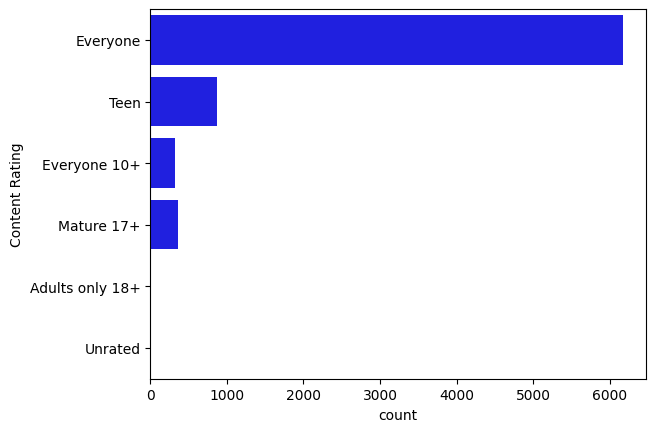

In [ ]:
#Distribuzione della variabile Content Rating

sns.countplot(y='Content Rating', data = df_google_ps_clean, color='blue')
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_content = df_google_ps_clean['Content Rating'].value_counts().reset_index()
temporary_table_content.columns = ['Content Rating','Count']

temporary_table_content['percent'] = (temporary_table_content['Count'] / temporary_table_content['Count'].sum()*100).round(2)
temporary_table_content.head(10)

,Content Rating,Count,percent
0,Everyone,6166,79.84
1,Teen,868,11.24
2,Mature 17+,368,4.76
3,Everyone 10+,318,4.12
4,Adults only 18+,2,0.03
5,Unrated,1,0.01


In [ ]:
print(f"L'{temporary_table_content['percent'].loc[0]}% delle app è targetizzato per {temporary_table_content['Content Rating'].loc[0]}.")

L'79.84% delle app è targetizzato per Everyone.


#### **Variabile "Genres"**

In [ ]:
df_google_ps_clean['Genres_1'].describe()

count      7723
unique       48
top       Tools
freq        633
Name: Genres_1, dtype: object

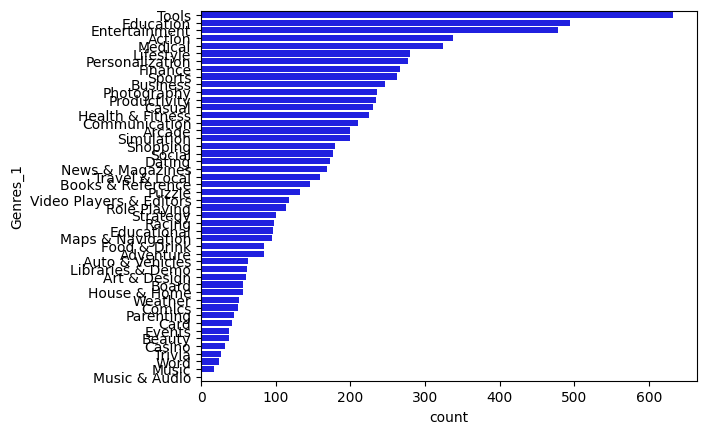

In [ ]:
#Distribuzione della variabile Content Rating

order_2 = df_google_ps_clean['Genres_1'].value_counts().index
sns.countplot(y='Genres_1', data = df_google_ps_clean, color='blue', order=order_2)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_genre = df_google_ps_clean['Genres_1'].value_counts().reset_index()
temporary_table_genre.columns = ['Genres_1','Count']

temporary_table_genre['percent'] = (temporary_table_genre['Count'] / temporary_table_genre['Count'].sum()*100).round(2)
temporary_table_genre.head(10)

,Genres_1,Count,percent
0,Tools,633,8.20
1,Education,495,6.41
2,Entertainment,478,6.19
3,Action,338,4.38
4,Medical,324,4.20
5,Lifestyle,280,3.63
6,Personalization,278,3.60
7,Finance,266,3.44
8,Sports,263,3.41
9,Business,246,3.19


In [ ]:
print(f"L'{temporary_table_genre['percent'].loc[0]}% delle app è targetizzato per {temporary_table_genre['Genres_1'].loc[0]}.")

L'8.2% delle app è targetizzato per Tools.


In [ ]:
df_google_ps_clean['Genres_1'].describe()

count      7723
unique       48
top       Tools
freq        633
Name: Genres_1, dtype: object

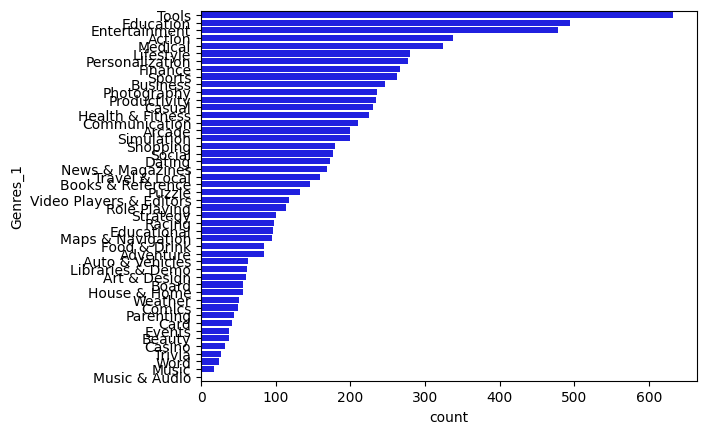

In [ ]:
#Distribuzione della variabile Content Rating

order_2 = df_google_ps_clean['Genres_1'].value_counts().index
sns.countplot(y='Genres_1', data = df_google_ps_clean, color='blue', order=order_2)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_genre = df_google_ps_clean['Genres_1'].value_counts().reset_index()
temporary_table_genre.columns = ['Genres_1','Count']

temporary_table_genre['percent'] = (temporary_table_genre['Count'] / temporary_table_genre['Count'].sum()*100).round(2)
temporary_table_genre.head(10)

,Genres_1,Count,percent
0,Tools,633,8.20
1,Education,495,6.41
2,Entertainment,478,6.19
3,Action,338,4.38
4,Medical,324,4.20
5,Lifestyle,280,3.63
6,Personalization,278,3.60
7,Finance,266,3.44
8,Sports,263,3.41
9,Business,246,3.19


In [ ]:
print(f"L'{temporary_table_genre['percent'].loc[0]}% delle app è targetizzato per {temporary_table_genre['Genres_1'].loc[0]}.")

L'8.2% delle app è targetizzato per Tools.


In [ ]:
df_merged['Sentiment'].describe()

count        45010
unique           3
top       Positive
freq         28138
Name: Sentiment, dtype: object

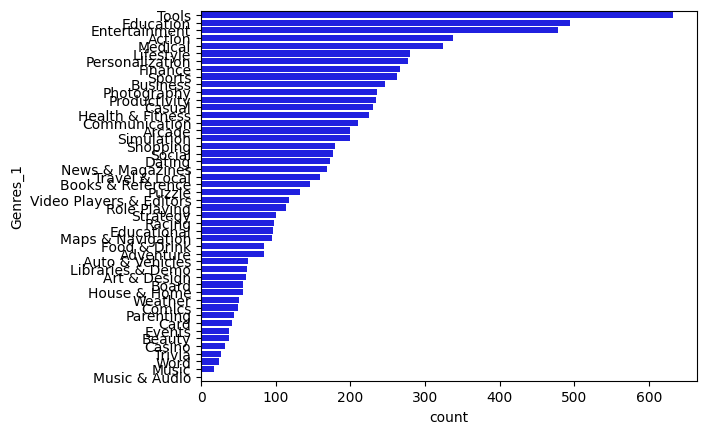

In [ ]:
#Distribuzione della variabile Content Rating

order_2 = df_google_ps_clean['Genres_1'].value_counts().index
sns.countplot(y='Genres_1', data = df_google_ps_clean, color='blue', order=order_2)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_genre = df_google_ps_clean['Genres_1'].value_counts().reset_index()
temporary_table_genre.columns = ['Genres_1','Count']

temporary_table_genre['percent'] = (temporary_table_genre['Count'] / temporary_table_genre['Count'].sum()*100).round(2)
temporary_table_genre.head(10)

,Genres_1,Count,percent
0,Tools,633,8.20
1,Education,495,6.41
2,Entertainment,478,6.19
3,Action,338,4.38
4,Medical,324,4.20
5,Lifestyle,280,3.63
6,Personalization,278,3.60
7,Finance,266,3.44
8,Sports,263,3.41
9,Business,246,3.19


In [ ]:
print(f"L'{temporary_table_genre['percent'].loc[0]}% delle app è targetizzato per {temporary_table_genre['Genres_1'].loc[0]}.")

L'8.2% delle app è targetizzato per Tools.


In [ ]:
df_google_ps_clean['Genres_1'].describe()

count      7723
unique       48
top       Tools
freq        633
Name: Genres_1, dtype: object

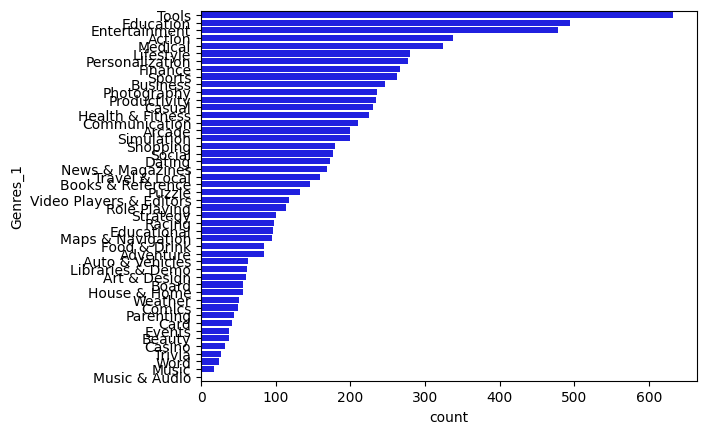

In [ ]:
#Distribuzione della variabile Content Rating

order_2 = df_google_ps_clean['Genres_1'].value_counts().index
sns.countplot(y='Genres_1', data = df_google_ps_clean, color='blue', order=order_2)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_genre = df_google_ps_clean['Genres_1'].value_counts().reset_index()
temporary_table_genre.columns = ['Genres_1','Count']

temporary_table_genre['percent'] = (temporary_table_genre['Count'] / temporary_table_genre['Count'].sum()*100).round(2)
temporary_table_genre.head(10)

,Genres_1,Count,percent
0,Tools,633,8.20
1,Education,495,6.41
2,Entertainment,478,6.19
3,Action,338,4.38
4,Medical,324,4.20
5,Lifestyle,280,3.63
6,Personalization,278,3.60
7,Finance,266,3.44
8,Sports,263,3.41
9,Business,246,3.19


In [ ]:
print(f"L'{temporary_table_genre['percent'].loc[0]}% delle app è targetizzato per {temporary_table_genre['Genres_1'].loc[0]}.")

L'8.2% delle app è targetizzato per Tools.


#### **Variabile "Sentiment"**

In [ ]:
#Descrittive

df_merged['Sentiment'].describe()

count        45010
unique           3
top       Positive
freq         28138
Name: Sentiment, dtype: object

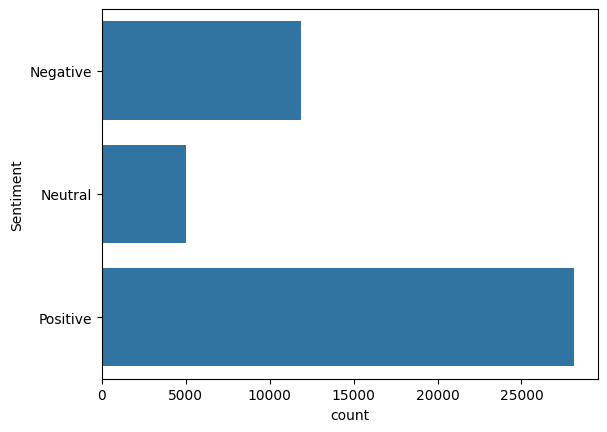

In [ ]:
#Distribuzione della variabile Sentiment

sns.countplot(y='Sentiment', data = df_merged)
plt.show()

In [ ]:
#Tabella delle frequenze

temporary_table_sentiment = df_merged['Sentiment'].value_counts().reset_index()
temporary_table_sentiment.columns = ['Sentiment','Count']

temporary_table_sentiment['percent'] = (temporary_table_sentiment['Count'] / temporary_table_sentiment['Count'].sum()*100).round(2)
temporary_table_sentiment.head(3)

,Sentiment,Count,percent
0,Positive,28138,62.51
1,Negative,11839,26.30
2,Neutral,5033,11.18


In [ ]:
print(f"La maggior parte delle app (il {temporary_table_sentiment['percent'].loc[0]}%) del dataset ha delle recensioni di sentiment {temporary_table_sentiment['Sentiment'].loc[0]}.")

La maggior parte delle app (il 62.51%) del dataset ha delle recensioni di sentiment Positive.


#### **Variabile "Sentiment_polarity"**

In [ ]:
#Descrittive

df_merged['Sentiment_Polarity'].describe()

count    45010.000000
mean         0.153659
std          0.336610
min         -1.000000
25%         -0.016358
50%          0.123864
75%          0.350000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

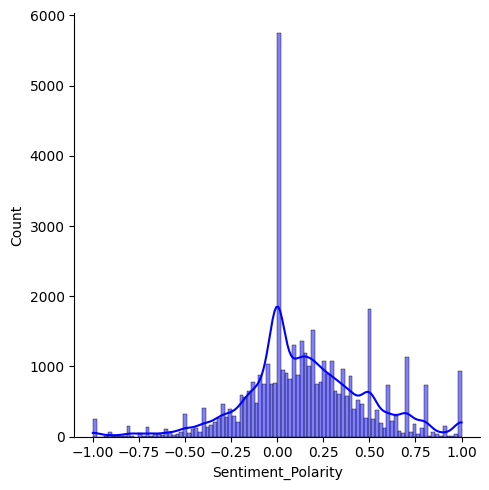

In [ ]:
#Distribuzione della variabile Rating

sns.displot(df_merged['Sentiment_Polarity'], color='blue', kde=True)
plt.show()

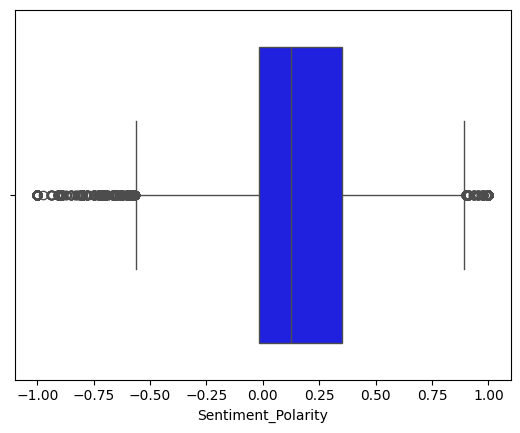

In [ ]:
#Boxplot

sns.boxplot(df_merged['Sentiment_Polarity'], color='blue', orient='h')
plt.show()

In [ ]:
#Skewness

df_google_ps_sentiment_polarity = df_merged['Sentiment_Polarity'].dropna().copy()
skewness_sentiment_polarity = skew(df_google_ps_sentiment_polarity).round(2)

if skewness_sentiment_polarity == 0:
  print(f"Il valore skew è {skewness_sentiment_polarity} dunque la distribuzione è simmetrica")
elif skewness_sentiment_polarity < 1 and skewness_sentiment_polarity > 0 or skewness_sentiment_polarity > -1 and skewness_sentiment_polarity < 0:
  print(f"Il valore skew è {skewness_sentiment_polarity} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_sentiment_polarity} dunque la distribuzione è asimmetrica")

Il valore skew è 0.0 dunque la distribuzione è simmetrica


In [ ]:
#Calcolo l'indice di Curtosi

curtosi_sentiment_polarity = kurtosis(df_merged['Sentiment_Polarity'], fisher=True)

if curtosi_sentiment_polarity > 0.5:
  interpretazione_sentiment_polarity = "la distribuzione è leptocurtica con code pesanti."
elif curtosi_sentiment_polarity < -0.5:
  interpretazione_sentiment_polarity = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione_sentiment_polarity = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi_sentiment_polarity}. Secondo l'interpretazione, {interpretazione_sentiment_polarity}")

Curtosi della variabile 'Rating': 0.8020468443737849. Secondo l'interpretazione, la distribuzione è leptocurtica con code pesanti.


#### **Variabile "Sentiment_Subjectivity"**

In [ ]:
#Descrittive

df_merged['Sentiment_Subjectivity'].describe()

count    45010.000000
mean         0.497954
std          0.239799
min          0.000000
25%          0.387500
50%          0.514286
75%          0.633333
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

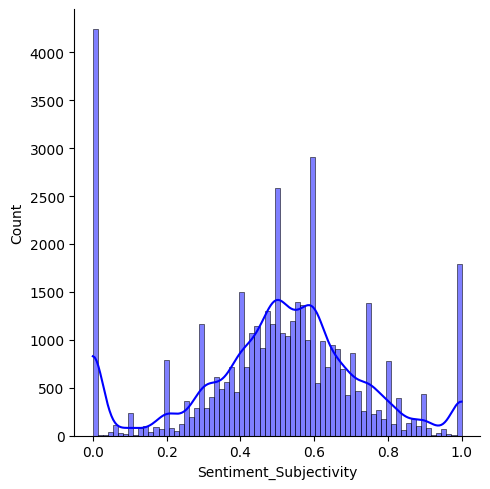

In [ ]:
#Distribuzione della variabile Rating

sns.displot(df_merged['Sentiment_Subjectivity'], color='blue', kde=True)
plt.show()

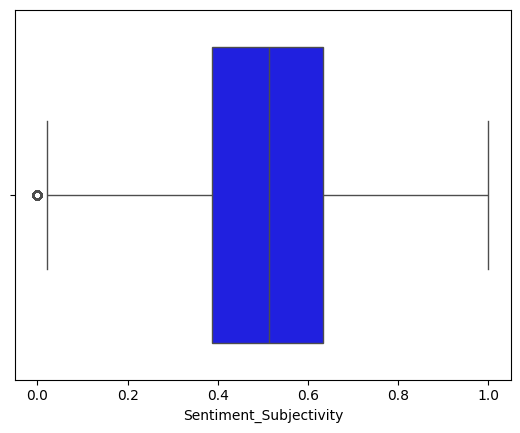

In [ ]:
#Boxplot

sns.boxplot(df_merged['Sentiment_Subjectivity'], color='blue', orient='h')
plt.show()

In [ ]:
#Skewness

df_google_ps_sentiment_subj = df_merged['Sentiment_Subjectivity'].dropna().copy()
skewness_sentiment_subj = skew(df_google_ps_sentiment_subj).round(2)

if skewness_sentiment_subj == 0:
  print(f"Il valore skew è {skewness_sentiment_subj} dunque la distribuzione è simmetrica")
elif skewness_sentiment_subj < 1 and skewness_sentiment_subj > 0 or skewness_sentiment_subj > -1 and skewness_sentiment_subj < 0:
  print(f"Il valore skew è {skewness_sentiment_subj} dunque la distribuzione è moderatamente asimmetrica")
else:
  print(f"Il valore skew è {skewness_sentiment_subj} dunque la distribuzione è asimmetrica")

Il valore skew è -0.35 dunque la distribuzione è moderatamente asimmetrica


In [ ]:
#Calcolo l'indice di Curtosi

curtosi_sentiment_subj = kurtosis(df_merged['Sentiment_Subjectivity'], fisher=True)

if curtosi_sentiment_subj > 0.5:
  interpretazione_sentiment_subj = "la distribuzione è leptocurtica con code pesanti."
elif curtosi_sentiment_subj < -0.5:
  interpretazione_sentiment_subj = "la distribuzione è platicurtica con code leggere."
else:
  interpretazione_sentiment_subj = "la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana."

print(f"Curtosi della variabile 'Rating': {curtosi_sentiment_subj}. Secondo l'interpretazione, {interpretazione_sentiment_subj}")

Curtosi della variabile 'Rating': 0.11166364668829942. Secondo l'interpretazione, la distribuzione è mesocurtica, simile a una normale distribuzione gaussiana.


### **Relazioni tra variabili**

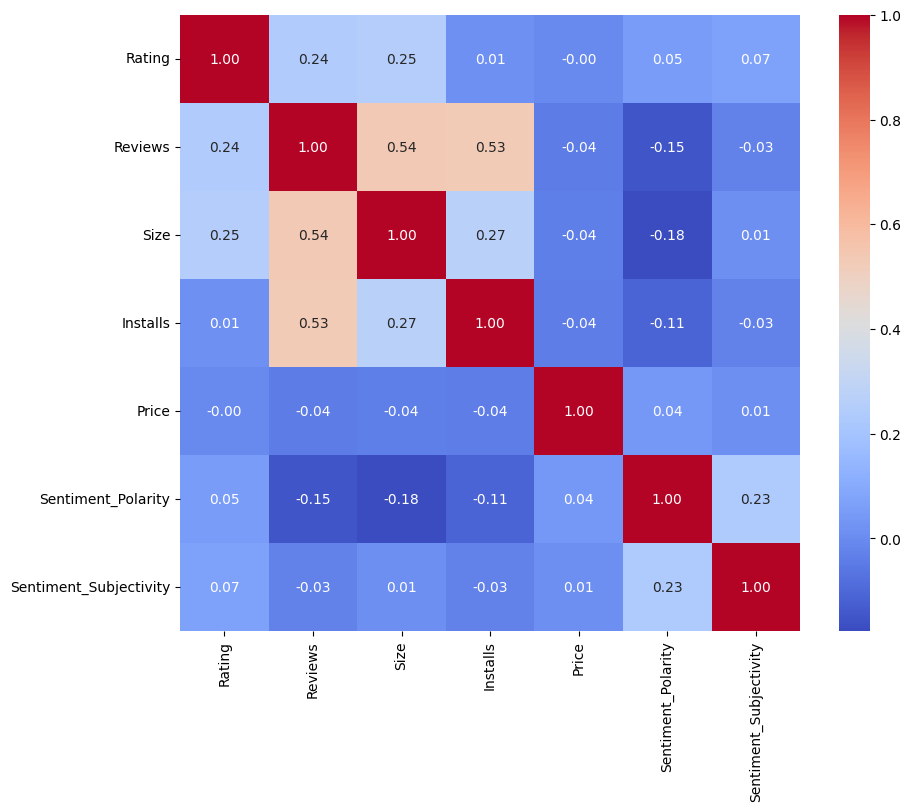

In [ ]:
correlation_matrix = df_merged.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
print("Le variabili numeriche del dataframe non sembrano essere correlate tra loro, a eccezione di Size, Reviews e Installs.")

Le variabili numeriche del dataframe non sembrano essere correlate tra loro, a eccezione di Size, Reviews e Installs.


## **Analisi**

Per poter comprendere l'area di mercato con più opportunità mi servo

1. Del conteggio delle righe per categoria definisco quanta competizione esiste tra le varie categorie

2. Della somma delle installazioni (stima) per categoria e la somma delle recensioni definisco quanta domanda già ci sia per quelle categorie di app


In [ ]:
#Creo il dataframe filtrato con le categorie di interesse e lo raggruppo definendo i vari metodi di aggregazione

df_type_earnings = df_google_ps_clean[['Type','Installs','Price','Category','Reviews']].copy()
grouped_df_type_earnings = df_type_earnings[['Installs','Category','Type','Price','Reviews']].groupby(['Category','Type'])\
                                                                                             .agg({'Price':'mean','Installs':'sum','Category':'count','Reviews':'sum'})\
                                                                                             .rename(columns={'Category':'Category_count'})\
                                                                                             .sort_values('Installs', ascending=False)

#Calcolo le mediane del conteggio categoria, installazioni e recensioni

median_value_category_count = grouped_df_type_earnings['Category_count'].median()
median_value_installs = grouped_df_type_earnings['Installs'].median()
median_value_reviews = grouped_df_type_earnings['Reviews'].median()

#Filtro il dataframe per ottenere le categorie più interessanti, cioè quelle che
#corrispondono al mix di criteri che ho scelto in precedenza

filtered_grouped_df_type_earnings = grouped_df_type_earnings[(grouped_df_type_earnings['Category_count'] <= median_value_category_count) &
                                                             (grouped_df_type_earnings['Installs'] >= median_value_installs) &
                                                             (grouped_df_type_earnings['Reviews'] >= median_value_reviews)].copy()


filtered_grouped_df_type_earnings

,,Price,Installs,Category_count,Reviews
Category,Type,,,,
WEATHER,Free,0.0,138985000,45,3836172
ART_AND_DESIGN,Free,0.0,99212100,55,1085054
HOUSE_AND_HOME,Free,0.0,74982000,56,1644159


In [ ]:
print(f"La mia app apparterrà alla categoria {filtered_grouped_df_type_earnings.index.get_level_values('Category')[0]} e sarà di tipo {filtered_grouped_df_type_earnings.index.get_level_values('Type')[0]}.\
\nInfatti, questa categoria di app nonostante abbia {filtered_grouped_df_type_earnings['Installs'].iloc[0].round(0)} download e {filtered_grouped_df_type_earnings['Reviews'].iloc[0].round(0)} recensioni\
\npresenta solamente {filtered_grouped_df_type_earnings['Category_count'].iloc[0].round(0)} competitor.")

La mia app apparterrà alla categoria WEATHER e sarà di tipo Free.
Infatti, questa categoria di app nonostante abbia 138985000 download e 3836172 recensioni
presenta solamente 45 competitor.


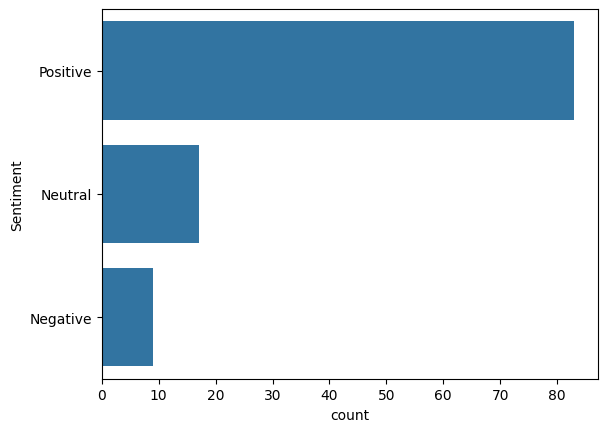

In [ ]:
#Analizzo il sentiment dietro le app di weather free.

df_merged_filtered = df_merged[(df_merged['Category'] == filtered_grouped_df_type_earnings.index.get_level_values('Category')[0]) & (df_merged['Type'] == filtered_grouped_df_type_earnings.index.get_level_values('Type')[0])].copy()

#Distribuzione della variabile Sentiment

sns.countplot(y='Sentiment', data = df_merged_filtered)
plt.show()

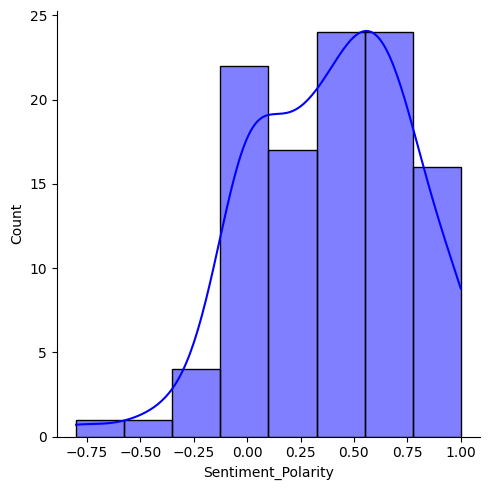

In [ ]:
#Analizzo il sentiment dietro le app di weather free.

sns.displot(df_merged_filtered['Sentiment_Polarity'], color='blue', kde=True)
plt.show()

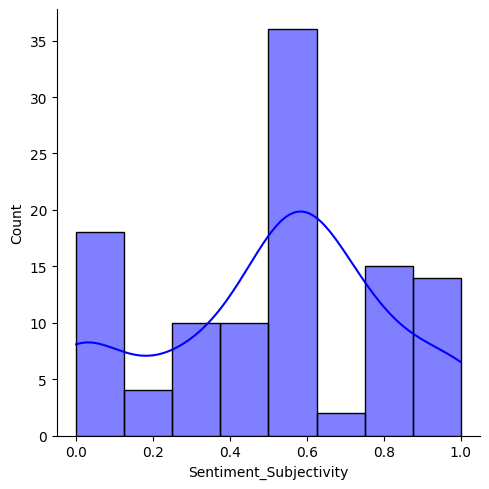

In [ ]:
#Distribuzione della variabile Rating

sns.displot(df_merged_filtered['Sentiment_Subjectivity'], color='blue', kde=True)
plt.show()

In [ ]:
print(f"In definitiva sembra esserci un sentiment positivo relativo alle app della categoria {filtered_grouped_df_type_earnings.index.get_level_values('Category')[0]} di tipo {filtered_grouped_df_type_earnings.index.get_level_values('Type')[0]}.")

In definitiva sembra esserci un sentiment positivo relativo alle app della categoria WEATHER di tipo Free.
